<a href="https://colab.research.google.com/github/subho99/Computational-Data-Science/blob/main/SubhajitBasistha_M2_NB_MiniProject_2_Credit_risk_modelling_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification Program in Computational Data Science
## A program by IISc and TalentSprint
### Mini-Project: Credit risk modelling using Logistic Regression

## Problem Statement

Predict the loan defaulters using a Logistic Regression model on the credit risk data and calculate credit scores

## Learning Objectives

At the end of the mini-project, you will be able to :

* perform data exploration, preprocessing and visualization
* implement Logistic Regression using manual code or using sklearn library
* evaluate the model using appropriate performance metrics
* develop a credit scoring system

## Dataset

The dataset chosen for this mini-project is the [Give Me Some Credit](https://cdn.iisc.talentsprint.com/CDS/Give_me_some_credit_BigML.pdf) dataset which can be used to build models for predicting loan repayment defaulters
#### Datafields

- **SeriousDlqin2yrs:** Person experienced 90 days past due delinquency or worse
- **RevolvingUtilizationOfUnsecuredLines:** Total balance on credit cards and personal lines of credit except real estate and no installment debt like car loans divided by the sum of credit limits
- **age:** Age of borrower in years
- **NumberOfTime30-59DaysPastDueNotWorse:** Number of times borrower has been 30-59 days past due but no worse in the last 2 years.
- **DebtRatio:** Monthly debt payments, alimony,living costs divided by monthy gross income
- **MonthlyIncome:** Monthly income
- **NumberOfOpenCreditLinesAndLoans:** Number of Open loans (installment like car loan or mortgage) and Lines of credit (e.g. credit cards)
- **NumberOfTimes90DaysLate:** Number of times borrower has been 90 days or more past due.
- **NumberRealEstateLoansOrLines:**	Number of mortgage and real estate loans including home equity lines of credit
- **NumberOfTime60-89DaysPastDueNotWorse:**	Number of times borrower has been 60-89 days past due but no worse in the last 2 years.
- **NumberOfDependents:** Number of dependents in family excluding themselves (spouse, children etc.)

## Information

Credit risk arises when a corporate or individual borrower fails to meet their debt obligations. From the lender's perspective, credit risk could disrupt its cash flows or increase collection costs, since the lender may be forced to hire a debt collection agency to enforce the collection. The loss may be partial or complete, where the lender incurs a loss of part of the loan or the entire loan extended to the borrower.

Credit scoring algorithms, which calculate the probability of default, are the best methods that banks use to determine whether or not a loan should be granted. 

In order to build a credit scoring system, the following feature transformations are performed:

#### Weight of Evidence and Information value

Logistic regression is a commonly used technique in credit scoring for solving binary classification problems. Prior to model fitting, another iteration of variable selection is valuable to check if the newly WOE transformed variables are still good model candidates. Preferred candidate variables are those with higher information value having a linear relationship with the dependent variable, have good coverage across all categories, have a normal distribution, contain a notable overall contribution, and are relevant to the business.

**Weight of evidence** (WOE) is a powerful tool for feature representation and evaluation in data science. WOE can provide interpret able transformation to both categorical and numerical features. The weight of evidence tells the predictive power of an independent variable in relation to the dependent variable. Since it evolved from credit scoring world, it is generally described as a measure of the separation of good and bad customers. "Bad Customers" refers to the customers who defaulted on a loan. and "Good Customers" refers to the customers who paid back loan. WOE can be calculated using the below formula:

$$WOE = ln \left( \frac{\%   of  Non\_Events}{\%   of  Events} \right)$$

Steps to calculate WOE
* For a continuous variable, split data into 10 parts (or lesser depending on the distribution).
* Calculate the number of events and non-events in each group (bin)
* Calculate the % of events and % of non-events in each group.
* Calculate WOE by taking natural log of division of % of non-events and % of events

**Information value** is one of the most useful technique to select important variables in a predictive model. It helps to rank variables on the basis of their importance. The IV is calculated using the following formula :
$$IV = ∑ (\% of Non\_Events - \% of Events) * WOE$$

Read more about `WOE` and `IV` from the following [link](https://medium.com/@yanhuiliu104/credit-scoring-scorecard-development-process-8554c3492b2b)

## Grading = 10 Points

### Download the dataset

In [ ]:
#@title Download Dataset
!wget -qq https://cdn.iisc.talentsprint.com/CDS/MiniProjects/GiveMeSomeCredit.csv
!pip -qq install xverse
print("Data Downloaded Successfully!")

Data Downloaded Successfully!


### Import Neccesary Packages

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sns
from matplotlib import pyplot as plt
import math
from xverse.transformer import MonotonicBinning,WOE
%matplotlib inline

### Load the dataset

In [ ]:
# YOUR CODE HERE
GiveMeSomeCredit_data = pd.read_csv("GiveMeSomeCredit.csv")
GiveMeSomeCredit_data.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


#### Describe the all statistical properties of the train dataset

In [ ]:
# YOUR CODE HERE
GiveMeSomeCredit_data.describe()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,75000.500000,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,43301.414527,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75000.500000,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112500.250000,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


### Pre-processing (1 point)

#### Remove unwanted columns

**Observation-1:**\
**The Pandas dataset is having its by default row index. Additionally, there is the column 'Unnamed: 0' containing the similar information i.e., the index of each record.**\
**Hence, there is no need to keep the column 'Unnamed: 0'. So, we reject the column 'Unnamed: 0'**

In [ ]:
# YOUR CODE HERE
GiveMeSomeCredit_data.drop("Unnamed: 0",axis=1,inplace=True)

#### Handle the missing data

Find the how many null values in the dataset and fill with mean or remove.

In [ ]:
# YOUR CODE HERE
GiveMeSomeCredit_data.isna().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

In [ ]:
# Replacing the missing values with the mean of corresponding feature
credit_data_df= GiveMeSomeCredit_data.fillna((GiveMeSomeCredit_data.mean()))
credit_data_df.isna().sum()

SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

In [ ]:
credit_data_df.shape

(150000, 11)

### EDA &  Visualization ( 1 point)

#### Calculate the percentage of the target lebels and visualize with a graph

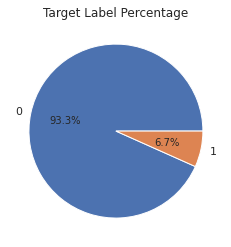

In [ ]:
# YOUR CODE HERE
import numpy as np
labels, counts = np.unique(credit_data_df['SeriousDlqin2yrs'], return_counts = True)
percentage_SeriousDlqin2yrs = (counts / len(credit_data_df)) * 100

# Creating a pie plot to show the percentage of the target lebels
plt.pie(percentage_SeriousDlqin2yrs, labels = labels, autopct = '%1.1f%%')
plt.title('Target Label Percentage')
plt.show()

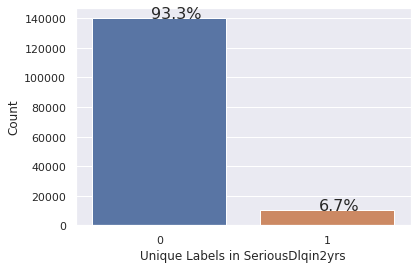

In [ ]:
# Utilizing Seaborn countplot
sns.set(style = "darkgrid")
ax = plt.gca()
sns.countplot(x = "SeriousDlqin2yrs", data = credit_data_df)
ax.set_xlabel("Unique Labels in SeriousDlqin2yrs")
ax.set_ylabel("Count")

# Displaying the percentage of each unique label
total = float(len(credit_data_df))
for g in ax.patches:
    percentage = '{:.1f}%'.format(100 * g.get_height()/total)
    x = g.get_x() + g.get_width() / 2 - 0.05
    y = g.get_y() + g.get_height() + 6
    ax.annotate(percentage, (x, y), size = 16)
plt.show()

#### Plot the distribution of SeriousDlqin2yrs by age

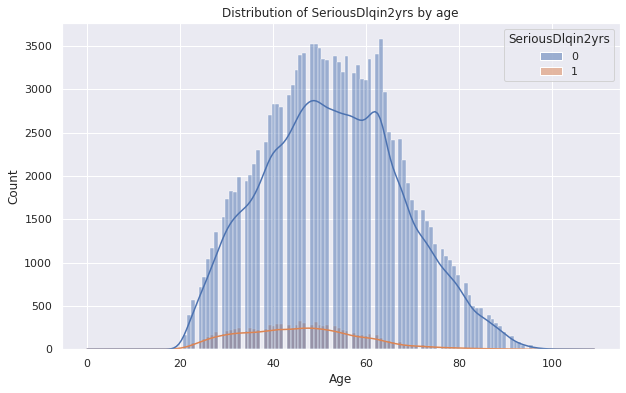

In [ ]:
# YOUR CODE HERE
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Creating the histogram with density plot overlay
sns.histplot(data = credit_data_df, x='age', hue='SeriousDlqin2yrs', kde=True, ax=ax)

# Set the title and labels
ax.set_title('Distribution of SeriousDlqin2yrs by age')
ax.set_xlabel('Age')
ax.set_ylabel('Count')

# Show the plot
plt.show()

SeriousDlqin2yrs    0
age                  
0                   1
21                170
22                398
23                571
24                718
..                ...
102                 3
103                 3
105                 1
107                 1
109                 2

[86 rows x 1 columns]
SeriousDlqin2yrs    1
age                  
21                 13
22                 36
23                 70
24                 98
25                121
..                ...
93                  1
94                  1
95                  1
99                  2
101                 1

[76 rows x 1 columns]


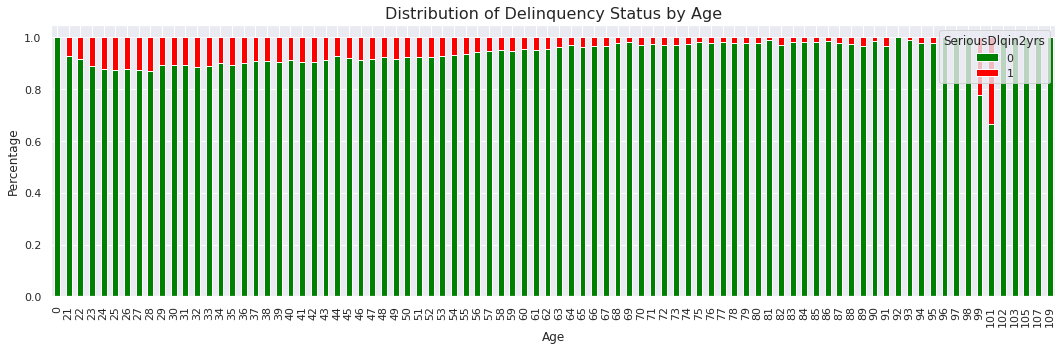

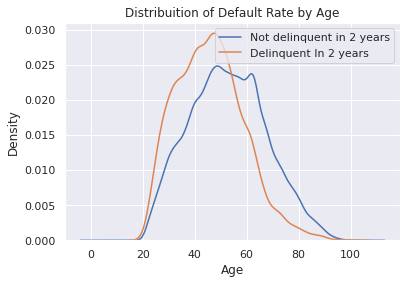

In [ ]:
# Not due delinquency or Not worse 
credit_data_notDlq_df = credit_data_df[credit_data_df["SeriousDlqin2yrs"] == 0]
age_grouped_df0 = credit_data_notDlq_df.groupby('age')
age_value_counts0 = age_grouped_df0['SeriousDlqin2yrs'].value_counts()
age_value_counts0 = age_value_counts0.unstack()
print(age_value_counts0)

# Due delinquency or worse 
credit_data_notDlq_df = credit_data_df[credit_data_df["SeriousDlqin2yrs"] == 1]
age_grouped_df1 = credit_data_notDlq_df.groupby('age')
age_value_counts1 = age_grouped_df1['SeriousDlqin2yrs'].value_counts()
age_value_counts1 = age_value_counts1.unstack()
print(age_value_counts1)

age_grouped_df = credit_data_df.groupby('age')
age_counts = age_grouped_df['SeriousDlqin2yrs'].value_counts().unstack()

# Normalize the counts
age_counts_norm = age_counts.div(age_counts.sum(axis=1), axis=0)

# Create bar plot showing percentage along y-axis
ax = age_counts_norm.plot(kind='bar', stacked=True, figsize=(18, 5), color=['green', 'red'])

# Set plot title and axis labels
ax.set_title('Distribution of Delinquency Status by Age', fontsize=16)
ax.set_xlabel('Age', fontsize=12)
ax.set_ylabel('Percentage', fontsize=12)

# Show plot
plt.show()

# Creating distribution plot showing density along y-axis
sns.kdeplot(credit_data_df[credit_data_df["SeriousDlqin2yrs"] == 0]["age"], label="Not delinquent in 2 years")
sns.kdeplot(credit_data_df[credit_data_df["SeriousDlqin2yrs"] == 1]["age"], label="Delinquent In 2 years")
plt.legend()
plt.xlabel('Age')
plt.title('Distribuition of Default Rate by Age')
plt.show()


#### Calculate the correlation and plot the heatmap

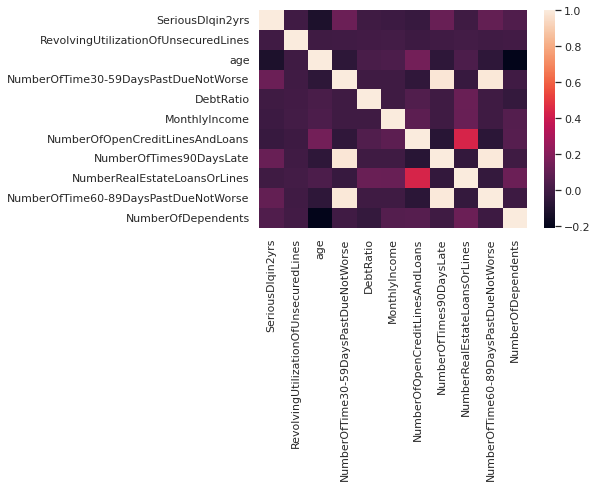

In [ ]:
# YOUR CODE HERE
credit_data_df[credit_data_df.columns[:]].corr()
sns.heatmap(credit_data_df[credit_data_df.columns[:]].corr(),fmt=".1f")
plt.show()

**High correlation coefficients are observed between the categorical features**\
**The continuous features are not having high correlation**\
**Hence, we are not rejecting any features at this stage**

Text(0.5, 1.0, 'MonthlyIncome Box Plot')

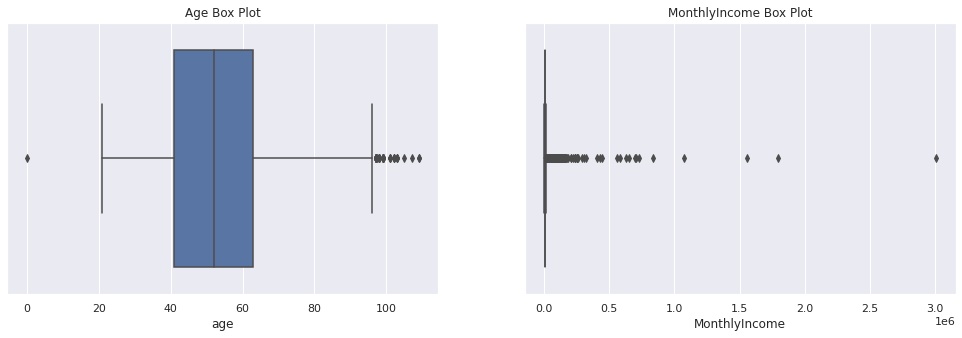

In [ ]:
# Creating a box plot over the age and monthly salary
fig, axs = plt.subplots(ncols = 2, figsize = (17, 5))
sns.boxplot(x = 'age', data = credit_data_df, ax = axs[0])
axs[0].set_title('Age Box Plot')
sns.boxplot(x = 'MonthlyIncome', data = credit_data_df, ax = axs[1])
axs[1].set_title('MonthlyIncome Box Plot')

1. A box plot can be a useful visualization for exploring the distribution of a continuous variable and identifying outliers, but it is not always necessary in credit risk analysis or logistic regression.

2. In credit risk analysis, the focus is often on identifying variables that are predictive of credit risk, and the relationship between these variables and the target variable (i.e., 'SeriousDlqin2yrs') is typically examined using statistical tests, correlation matrices, and logistic regression coefficients. 

3. Box plots may not be as useful in this context since the focus is on comparing groups based on their relationship with the target variable rather than exploring the distribution of individual variables.

### Data Engineering (2 points)

#### Weight of Evidence and Information value

* Arrange the binning for each variable with different bins
    * For eg. Age = 49, Age_quantile_range = (48, 56)
* Calculate information value and chooose the best features based on the rules given below

| Information Value |	Variable Predictiveness |
| --- | --- |
| Less than 0.02	|  Not useful for prediction |
| 0.02 to 0.1	| Weak predictive Power |
|  0.1 to 0.3 | Medium predictive Power |
| 0.3 to 0.5 | Strong predictive Power |
| >0.5 | Suspicious Predictive Power |

* Calculate Weight of evidence for the selected variables

Hint: Use [xverse](https://towardsdatascience.com/introducing-xverse-a-python-package-for-feature-selection-and-transformation-17193cdcd067). It is a machine learning Python module in the space of feature engineering, feature transformation and feature selection. It provides pre-built functions for the above steps, such as binning and conversion to WoE.

In [ ]:
# YOUR CODE HERE
import pandas as pd
from xverse.transformer import MonotonicBinning
from xverse.transformer import WOE

# Binning
clf = MonotonicBinning()
clf.fit(credit_data_df, credit_data_df['SeriousDlqin2yrs'])
print(clf.bins)

# Feature transformation using xverse package
xverse_transformed_feature = clf.transform(credit_data_df.iloc[:,1:])
xverse_transformed_feature.head()

{'SeriousDlqin2yrs': array([0., 1.]), 'RevolvingUtilizationOfUnsecuredLines': array([0.00000000e+00, 5.44198870e-02, 3.79945496e-01, 5.07080000e+04]), 'age': array([  0.,  45.,  59., 109.]), 'NumberOfTime30-59DaysPastDueNotWorse': array([ 0.,  1., 98.]), 'DebtRatio': array([0.00000000e+00, 2.38192456e-01, 5.69938302e-01, 3.29664000e+05]), 'MonthlyIncome': array([      0.        ,    4700.        ,    6670.22123739,
       3008750.        ]), 'NumberOfOpenCreditLinesAndLoans': array([ 0.,  6., 10., 58.]), 'NumberOfTimes90DaysLate': array([ 0.,  1., 98.]), 'NumberRealEstateLoansOrLines': array([ 0.,  1., 54.]), 'NumberOfTime60-89DaysPastDueNotWorse': array([ 0.,  1., 98.]), 'NumberOfDependents': array([ 0.,  1., 20.])}


,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,"(0.38, 50708.0]","(-0.001, 45.0]","(1.0, 98.0]","(0.57, 329664.0]","(6670.221, 3008750.0]","(10.0, 58.0]","(-0.001, 1.0]","(1.0, 54.0]","(-0.001, 1.0]","(1.0, 20.0]"
1,"(0.38, 50708.0]","(-0.001, 45.0]","(-0.001, 1.0]","(-0.001, 0.238]","(-0.001, 4700.0]","(-0.001, 6.0]","(-0.001, 1.0]","(-0.001, 1.0]","(-0.001, 1.0]","(-0.001, 1.0]"
2,"(0.38, 50708.0]","(-0.001, 45.0]","(-0.001, 1.0]","(-0.001, 0.238]","(-0.001, 4700.0]","(-0.001, 6.0]","(-0.001, 1.0]","(-0.001, 1.0]","(-0.001, 1.0]","(-0.001, 1.0]"
3,"(0.0544, 0.38]","(-0.001, 45.0]","(-0.001, 1.0]","(-0.001, 0.238]","(-0.001, 4700.0]","(-0.001, 6.0]","(-0.001, 1.0]","(-0.001, 1.0]","(-0.001, 1.0]","(-0.001, 1.0]"
4,"(0.38, 50708.0]","(45.0, 59.0]","(-0.001, 1.0]","(-0.001, 0.238]","(6670.221, 3008750.0]","(6.0, 10.0]","(-0.001, 1.0]","(-0.001, 1.0]","(-0.001, 1.0]","(-0.001, 1.0]"


In [ ]:
# Calculating Weight of Evidence using xverse package
clf = WOE()
clf.fit(credit_data_df, credit_data_df['SeriousDlqin2yrs'])

#Weight of Evidence calculation:
# WOE transformation dataset
clf.woe_df.head()

/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Variable_Name,Category,Count,Event,Non_Event,Event_Rate,Non_Event_Rate,Event_Distribution,Non_Event_Distribution,WOE,Information_Value
0,SeriousDlqin2yrs,0,139974,0,139974,0.00000,1.00000,0.000000,1.000000,0.000000,0.000000
1,SeriousDlqin2yrs,1,10026,10026,0,1.00000,0.00000,1.000000,0.000000,0.000000,0.000000
2,RevolvingUtilizationOfUnsecuredLines,"(-0.001, 0.0544]",50000,877,49123,0.01754,0.98246,0.087473,0.350944,-1.389301,0.935429
3,RevolvingUtilizationOfUnsecuredLines,"(0.0544, 0.38]",50000,1556,48444,0.03112,0.96888,0.155196,0.346093,-0.802015,0.935429
4,RevolvingUtilizationOfUnsecuredLines,"(0.38, 50708.0]",50000,7593,42407,0.15186,0.84814,0.757331,0.302963,0.916188,0.935429


In [ ]:
WOE_Transformed_df = clf.transform(credit_data_df.iloc[:,1:])
WOE_Transformed_df

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0.916188,0.414666,1.901126,0.146810,-0.336321,-0.043992,-0.176674,-0.066080,-0.09799,0.269384
1,0.916188,0.414666,-0.257826,-0.108543,0.300624,0.161831,-0.176674,0.024285,-0.09799,-0.088266
2,0.916188,0.414666,-0.257826,-0.108543,0.300624,0.161831,-0.176674,0.024285,-0.09799,-0.088266
3,-0.802015,0.414666,-0.257826,-0.108543,0.300624,0.161831,-0.176674,0.024285,-0.09799,-0.088266
4,0.916188,0.043658,-0.257826,-0.108543,-0.336321,-0.200293,-0.176674,0.024285,-0.09799,-0.088266
...,...,...,...,...,...,...,...,...,...,...
149995,-1.389301,-0.804528,-0.257826,-0.108543,0.300624,0.161831,-0.176674,0.024285,-0.09799,-0.088266
149996,-0.802015,0.414666,-0.257826,0.146810,-0.081528,0.161831,-0.176674,0.024285,-0.09799,0.269384
149997,-0.802015,0.043658,-0.257826,0.146810,-0.081528,-0.043992,-0.176674,0.024285,-0.09799,-0.088266
149998,-1.389301,0.414666,-0.257826,-0.108543,-0.081528,0.161831,-0.176674,0.024285,-0.09799,-0.088266


$$Why$$ we don't use Scaling in this Logistic Regression user scenario? 

**1. Weights of Evidence (WOE) is commonly used in credit risk modelling with Logistic Regression to transform categorical variables into continuous variables, which are used in Linear Regression to get the output as continuous variable**

**2. This continuous variable is further passed to the input of the  Sigmoid function which can be applied for Logistic Regression Models.**\
**3. The WOE Transformation does not depend on the scale or distribution of the original variables and is designed to handle categorical variables directly.**\
**Hence we don't use Standard Scaling in this scenario**

$$Why$$ we don't use One Hot Encoding in this Logistis Regression Scenario?\
**1. In Logistic Regression, the input variables can be either continuous or categorical.**\
**2. However, continuous variables are more commonly used as input variables in Logistic Regression.**\
**3. The reason for this is that the Sigmoid Function is designed to handle continuous inputs and it may not work properly with categorical inputs**\
**Hence, we don't apply One Hot encoding in this scenario**

In [ ]:
# Information Value calculation:
#Information value dataset
Information_value_df = clf.iv_df
Information_value_df

,Variable_Name,Information_Value
8,RevolvingUtilizationOfUnsecuredLines,0.935429
6,NumberOfTimes90DaysLate,0.484202
4,NumberOfTime30-59DaysPastDueNotWorse,0.471831
5,NumberOfTime60-89DaysPastDueNotWorse,0.264824
10,age,0.219843
1,MonthlyIncome,0.065725
2,NumberOfDependents,0.023730
3,NumberOfOpenCreditLinesAndLoans,0.023300
0,DebtRatio,0.012360
7,NumberRealEstateLoansOrLines,0.001605


**In the 'Information_value_df' dataframe, Starting from the highest Information Value and coming down upto 1st 5 descending order Information Value does match with the given rule**\
Information Value = 0.1 to 0.3: Medium predictive Power\
Information Value = 0.3 to 0.5: Strong predictive Powe\
Information Value > 0.5: Suspicious predictive Powe\
**Feature Extraction:**\
**Hence, we are choosing the 1st 5 important features on the basis of 1st 5 highest Information value as per the range of selection given in the rule above**   

In [ ]:
extracted_features = clf.iv_df.Variable_Name.values[:5]
print("extracted_features:\n",extracted_features)
#print("Transformed data by WoE values:",woe_data)

extracted_features:
 ['RevolvingUtilizationOfUnsecuredLines' 'NumberOfTimes90DaysLate'
 'NumberOfTime30-59DaysPastDueNotWorse'
 'NumberOfTime60-89DaysPastDueNotWorse' 'age']


### Identify features,  target and split it into train and test

In [ ]:
# YOUR CODE HERE
print("Before WOE transformation and Information Value, the no. of features:",WOE_Transformed_df.shape[1])
print("After WOE transformation and Information Value, the no. of features:",len(extracted_features))

Before WOE transformation and Information Value, the no. of features: 10
After WOE transformation and Information Value, the no. of features: 5


In [ ]:
# Selecting the Information Value weighted extracted_features from the WOE transformed dataset
X = WOE_Transformed_df[extracted_features]

# As the target doesn't need to  undergo WOE transformation, hence we select the target as below
y = credit_data_df['SeriousDlqin2yrs']
print("X Dimension:",X.shape)
print("y Dimension:",y.shape)

# Doing Train Test split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=66)
print("Xtrain Dimension:",Xtrain.shape)
print("ytrain Dimension:",ytrain.shape)
print("Xtest Dimension:",Xtest.shape)
print("ytest Dimension:",ytest.shape)

X Dimension: (150000, 5)
y Dimension: (150000,)
Xtrain Dimension: (120000, 5)
ytrain Dimension: (120000,)
Xtest Dimension: (30000, 5)
ytest Dimension: (30000,)


### Logistic Regression from scratch using gradient method (2 points)

For Linear Regression, we had the hypothesis $yhat = w.X +b$ , whose output range was the set of all Real Numbers.
Now, for Logistic Regression our hypothesis is  $yhat = sigmoid(w.X + b)$ , whose output range is between 0 and 1 because by applying a sigmoid function, we always output a number between 0 and 1.

$yhat = \frac{1}{1 +e^{-(w.x+b)}}$

Hint: [logistic-regression-with-python](
https://medium.com/@ODSC/logistic-regression-with-python-ede39f8573c7)

In [ ]:
# YOUR CODE HERE
# Adding the Bias feature X0
b = np.ones((Xtrain.shape[0], 1))  
X_train = np.concatenate((b, Xtrain), axis=1)
print("After adding Bias Feature, X_train Dimension:",X_train.shape)
X_test = np.concatenate((np.ones((Xtest.shape[0], 1)), Xtest), axis=1)
print("After adding Bias Feature, X_test Dimension:",X_test.shape)
# Defining Initial weights
w = np.zeros(X_train.shape[1])
print("\nDimension of weights vector:",w.shape)

After adding Bias Feature, X_train Dimension: (120000, 6)
After adding Bias Feature, X_test Dimension: (30000, 6)

Dimension of weights vector: (6,)


In [ ]:
#Sigmoid method
def sigmoid(x, theta):
    t = np.dot(x, theta)
    sigma_t_min = np.minimum(1 / (1 + np.exp(-t)), 0.9999)
    sigma_t = np.maximum(sigma_t_min, 0.0001)
    return sigma_t
# Note:
# Since the output can be rounded by sigmoid function to 0 or 1 because some input values are too small or too large, we later 
# get the logarithm of zero which equals to the negative infinitely large number and cannot be used for further computations. 
# That’s why we manually bound our sigmoid function

def cost_function(x, y, theta):
    import numpy as np
    t = x.dot(theta)
    A = y*np.log(sigmoid(x, theta))
    B = (1-y)*np.log(1-sigmoid(x, theta))
    f_theta = (-1/x.shape[0]) * np.sum(A+B)
    return f_theta

def gradient_cost_function(x, y, theta):
    t = x.dot(theta)
    p_hat = sigmoid(x, theta)
    y_hat = p_hat
    error = (y_hat - y)
    gradient_f_theta = x.T.dot(y_hat - y) / y.shape[0]
    return gradient_f_theta

def update_theta(x, y, theta, learning_rate):
    theta = theta - learning_rate * gradient_cost_function(x, y, theta)
    return theta

from sklearn.metrics import mean_squared_error

def customizedfit(x, y, theta, lr, iterations, threshold=0.0005):
    costs = []
    for i in range(iterations):
        sigma = sigmoid(x, theta)
        MSE_loss = mean_squared_error(sigma, y)

        cost = cost_function(x, y, theta)
        #print("Training step:", i, " — Cost function:", f'{cost:.4f}')
        costs.append({"costs": cost, "weights": theta})
        if i > iterations and abs(costs[-2]['costs'] - costs[-1]['costs']) < threshold:
            break

        # gradient
        gradient_f_theta = gradient_cost_function(x, y, theta)
        # df_dtheta = np.dot(x.T, (sigma - y)) / y.shape[0]
        #Updating the weights
        theta = update_theta(x, y, theta, lr)
        weight = theta
    print("Weight:",weight)
    return weight, costs

In [ ]:
updated_weights, costs = customizedfit(X_train, ytrain, w, 0.1, 5000, 0.0005) # ytrain, weight, 0.1 , 5000

Weight: [-2.60816593  0.77074985  0.60220701  0.62029118  0.39673636  0.51998412]


**Finally having trained the model, we can make predictions, based on our model:**

In [ ]:
def predict_class(x, theta, DetectionThreshold):
    DetectedClass = (sigmoid(x, theta) >= 0.5).astype(int)
    return DetectedClass 

# Let’s compare, how predicted data are different than the real:

def get_accuracy(x, y, theta, DetectionThreshold):
    y_pred = predict_class(x, theta, DetectionThreshold)
    accuracy = (y_pred == y).sum() / y.shape[0]
    return accuracy 

accuracy_with_trainingData = get_accuracy(X_train, ytrain, updated_weights, 0.5)
accuracy_with_testData = get_accuracy(X_test, ytest, updated_weights, 0.5)

print("Accuracy on the training set:",accuracy_with_trainingData)

print("Accuracy on the test set:",accuracy_with_testData)

Accuracy on the training set: 0.93545
Accuracy on the test set: 0.9367


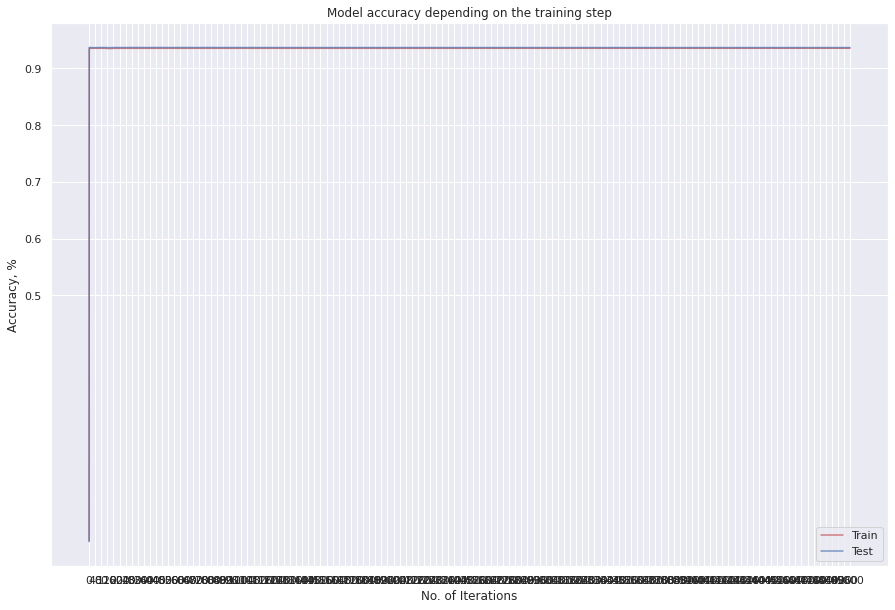

In [ ]:
plt.figure(figsize=(15,10))

plt.title("Model accuracy depending on the training step")

plt.plot(np.arange(0, len(costs)), [get_accuracy(X_train, ytrain, c["weights"], 0.5) for c in costs],\
         alpha=0.7, label= 'Train', color='r') 

#get_accuracy(X_train, ytrain, updated_weights, 0.5)

#costs.append({"costs": cost, "weights": theta})

plt.plot(np.arange(0, len(costs)), [get_accuracy(X_test, ytest, c["weights"], 0.5) for c in costs],\
         alpha=0.7, label= 'Test', color='b')

plt.xlabel('No. of Iterations')

plt.ylabel('Accuracy, %')

plt.legend(loc='best')

plt.grid(True)

plt.xticks(np.arange(0, len(costs)+1, 40))

plt.yticks(np.arange(0.5, 1, 0.1))

plt.show()

### Implement the Logistic regression using sklearn (2 points)

As there is imbalance in the class distribution, add weightage to the Logistic regression.

* Find the accuracy with class weightage in Logistic regression
* Find the accuracy without class weightage in Logistic regression

Hint: [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

**Class Weightage in Logistic Regression**
1. In logistic regression, the model predicts the probability of an input belonging to a certain class. The predicted class is then determined based on a threshold value. The accuracy of the model is typically measured by comparing the predicted class with the actual class and computing the number of correct predictions divided by the total number of predictions.

2. However, in some cases, the classes may be imbalanced, meaning that some classes have more samples than others. In such cases, the standard accuracy metric may not be appropriate because it can be biased towards the majority class.

3. To address this issue, we can use a weighted accuracy metric, which assigns a weight to each class based on its frequency in the data. The weighted accuracy is then computed by taking the average of the accuracy for each class, weighted by its frequency.

4. Using the weighted accuracy metric can provide a more accurate evaluation of the performance of a logistic regression model when dealing with imbalanced classes.

The formula for weighted accuracy is as follows:

weighted accuracy = sum(i=1 to K) (wi * Ti) / sum(i=1 to K) wi

where:
*   K is the number of classes
*   Ti is the number of correct predictions for class i
*   wi is the weight assigned to class i, which is typically the inverse of its frequency in the data







In [ ]:
#class_weight_range = [{0: 1, 1: w} for w in range(1, 21)]
percentage_SeriousDlqin2yrs = (counts / len(credit_data_df)) * 100
prcnt = np.ceil(percentage_SeriousDlqin2yrs)
Class_NonDlqn_frac = prcnt[0]/100 
Class_Dlqn_frac = (100-prcnt[0])/100
class_weights={0:Class_Dlqn_frac, 1: Class_NonDlqn_frac}
class_weights

{0: 0.06, 1: 0.94}

In [ ]:
# With weightage
# YOUR CODE HERE
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Define the range of values for class_weight parameter
percentage_SeriousDlqin2yrs = (counts / len(credit_data_df)) * 100
prcnt = np.ceil(percentage_SeriousDlqin2yrs)
Class_NonDlqn_frac = prcnt[0]/100 
Class_Dlqn_frac = (100-prcnt[0])/100
class_weights={0:Class_Dlqn_frac, 1: Class_NonDlqn_frac}
print(class_weights)
# Training the Logistic Regression Model with class_weights
logistic_regressor = LogisticRegression(class_weight=class_weights)
print(X_train.shape)
logistic_regressor.fit(X_train, ytrain)
training_score = logistic_regressor.score(X_train, ytrain)
print(X_test.shape)
print("Score using class_weight:")
print("Training_Score:",training_score)
testing_score = logistic_regressor.score(X_test, ytest)
print("Testing_Score:",testing_score)

# Predicting the classes
y_pred_test = logistic_regressor.predict(X_test)
print("\nUsing class_weight, the Predicted Class:",y_pred_test)

{0: 0.06, 1: 0.94}
(120000, 6)
(30000, 6)
Score using class_weight:
Training_Score: 0.6912583333333333
Testing_Score: 0.6907

Using class_weight, the Predicted Class: [0 1 1 ... 0 0 0]


In [ ]:
# Perform grid search over class_weight_range
class_weight_range = [{0: Class_Dlqn_frac, 1: w} for w in np.arange(0,2*Class_NonDlqn_frac,Class_NonDlqn_frac/5)]
param_grid = {'class_weight': class_weight_range}
Logistic_regressor = LogisticRegression(random_state=42)
grid_search = GridSearchCV(Logistic_regressor, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, ytrain)

# Evaluate the performance of the best model on the test set
best_logistic_regressor = grid_search.best_estimator_
y_pred_test_grid_search = best_logistic_regressor.predict(X_test)
accuracy = accuracy_score(ytest, y_pred_test_grid_search)
print("Using class_weight and Grid Search Method:")
print("Accuracy on test set:",accuracy)

best_class_weight = best_logistic_regressor.get_params()["class_weight"]
print("Best class_weight parameter:",best_class_weight)

Using class_weight and Grid Search Method:
Accuracy on test set: 0.9342
Best class_weight parameter: {0: 0.06, 1: 0.0}


In [ ]:
# Without weightage
# YOUR CODE HERE
logistic_regressor2 = LogisticRegression()
logistic_regressor2.fit(X_train, ytrain)
print(X_train.shape) 
print(X_test.shape)
training_score2 = logistic_regressor2.score(X_train, ytrain)
print("Score without using class_weight:")
print("Training_Score:",training_score2)

testing_score2 = logistic_regressor2.score(X_test,ytest)
print("Testing_Score:",testing_score2)


# Predicting the classes
y_pred_test2 = logistic_regressor2.predict(X_test)
print("\nWithout using class_weight, the Predicted Class:",y_pred_test2)

(120000, 6)
(30000, 6)
Score without using class_weight:
Training_Score: 0.93545
Testing_Score: 0.9367

Without using class_weight, the Predicted Class: [0 0 0 ... 0 0 0]


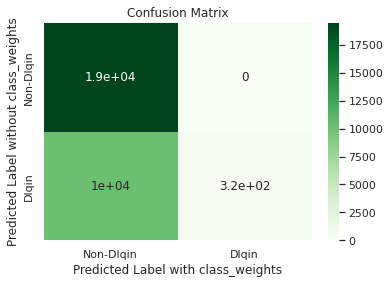

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
pred_data = np.column_stack((y_pred_test, y_pred_test2))
pred_data = pd.DataFrame(pred_data)
# calculate confusion matrix
cm = confusion_matrix(y_pred_test, y_pred_test2)

# create heatmap of confusion matrix
sns.heatmap(cm, annot=True, cmap='Greens', xticklabels=["Non-Dlqin", "Dlqin"], yticklabels=["Non-Dlqin", "Dlqin"])

# set plot properties
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label with class_weights")
plt.ylabel("Predicted Label without class_weights")
plt.show()

In [ ]:
# With class_weights
coeffs = logistic_regressor.coef_
intercept = logistic_regressor.intercept_
b = logistic_regressor.coef_[0][-1] # PDO = ln(2) / b ---> b = ln(2) / PDO
p_hat = logistic_regressor.predict_proba
print("With class_weights:\n")
print("coeffs:",coeffs)
print("intercept:",intercept)
print("b is the ratio between ln(2) and PDO, b=",b)
print("p_hat =",p_hat)

With class_weights:

coeffs: [[0.07270379 0.78763989 0.69778754 0.73112538 0.58753334 0.56809402]]
intercept: [0.0736006]
b is the ratio between ln(2) and PDO, b= 0.5680940247607024
p_hat = <bound method LogisticRegression.predict_proba of LogisticRegression(class_weight={0: 0.06, 1: 0.94})>


In [ ]:
# Without class_weights
coeffs = logistic_regressor2.coef_
intercept = logistic_regressor2.intercept_
b = logistic_regressor2.coef_[0][-1] # PDO = ln(2) / b ---> b = ln(2) / PDO
p_hat = logistic_regressor2.predict_proba
print("Without class_weights:\n")
print("coeffs:",coeffs)
print("intercept:",intercept)
print("b is the ratio between ln(2) and PDO, b=",b)
print("p_hat =",p_hat)

Without class_weights:

coeffs: [[1.00695776e-04 7.70365725e-01 6.02066046e-01 6.20241202e-01
  3.96647481e-01 5.22567725e-01]]
intercept: [-2.60835019]
b is the ratio between ln(2) and PDO, b= 0.5225677246080995
p_hat = <bound method LogisticRegression.predict_proba of LogisticRegression()>


### Credit scoring (1 point)

When scaling the model into a scorecard, we will need both the Logistic Regression coefficients from model fitting as well as the transformed WoE values. We will also need to convert the score from the model from the log-odds unit to a points system.
For each independent variable Xi, its corresponding score is:

$Score = \sum_{i=1}^{n} (-(β_i × WoE_i + \frac{α}{n}) × Factor + \frac{Offset}{n})$

Where:

βi — logistic regression coefficient for the variable Xi

α — logistic regression intercept

WoE — Weight of Evidence value for variable Xi

n — number of independent variable Xi in the model

Factor, Offset — known as scaling parameter

  - Factor = pdo / ln(2); pdo is points to double the odds
  - Offset = Round_of_Score - {Factor * ln(Odds)}

In [ ]:
# Scaling factors
# With class_weights
coeffs = logistic_regressor.coef_
intercept = logistic_regressor.intercept_


factor = 20/np.log(2)
offset = 600 - ( factor * np.log(50))
factor, offset, coeffs

(28.85390081777927,
 487.1228762045055,
 array([[0.07270379, 0.78763989, 0.69778754, 0.73112538, 0.58753334,
         0.56809402]]))

In [ ]:
# Scaling factors
# Without class_weights
coeffs = logistic_regressor2.coef_
intercept = logistic_regressor2.intercept_


factor = 20/np.log(2)
offset = 600 - ( factor * np.log(50))
factor, offset, coeffs

(28.85390081777927,
 487.1228762045055,
 array([[1.00695776e-04, 7.70365725e-01, 6.02066046e-01, 6.20241202e-01,
         3.96647481e-01, 5.22567725e-01]]))

In [ ]:
# YOUR CODE HERE
# Doing Train Test split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=66)
print("X Dimension:",X.shape)
print("Xtrain Dimension:",Xtrain.shape)
print("ytrain Dimension:",ytrain.shape)
print("Xtest Dimension:",Xtest.shape)
print("ytest Dimension:",ytest.shape)
print("X_train Dimension",X_train.shape)
print("X_test Dimension",X_test.shape)
X_features = np.vstack([X_train, X_test])
print("X_features Dimension",X_features.shape)
X_features = pd.DataFrame(X_features)

# Method-1:
scores = []
alpha = intercept
n = X_features.shape[1] # No. of independent features including Bias feature
# for idx, row in X_features.iterrows():
    # Score  = []
    # for i in range(len(row)+1):
        #score_i = ((-(coeffs[i] * row[i] + (alpha/n)) * factor) + (offset/n))
        # score_i = (-((row[i] * coeffs[i]) + (alpha/n)) * factor) + (offset/n)
        # Score.append(score_i)
    # Score = sum(Score)
    # scores.append(Score)
# print("All scores:",scores)
# print("Maximum Score:",max(scores))
# print("Minimum Score:",min(scores))

X Dimension: (150000, 5)
Xtrain Dimension: (120000, 5)
ytrain Dimension: (120000,)
Xtest Dimension: (30000, 5)
ytest Dimension: (30000,)
X_train Dimension (120000, 6)
X_test Dimension (30000, 6)
X_features Dimension (150000, 6)


In [ ]:
# Method-2:
scores = []
alpha = intercept
n = X_features.shape[1] # No. of independent features including Bias Feature
Beta = coeffs.ravel()
for idx, row in X_features.iterrows():
  part1 = Beta * row.values                       # Beta_i * WoE_i
  part2 = part1 + (alpha/n)                       # (Beta_i * WoE_i) + alpha / n
  part3 = -part2 * factor                         # -((Beta_i * WoE_i) + alpha / n) * Factor
  part4 = part3 + (offset/X_features.shape[1])    # -((Beta_i * WoE_i) + alpha / n) * Factor) + Offset / n
  Score = sum(part4)                              # sum
  scores.append(Score)                            # storing Score of each row in scores

print("All scores:",np.array(scores))
print("Maximum Score:",max(scores))
print("Minimum Score:",min(scores))

All scores: [550.16248679 544.56838447 588.35480843 ... 614.19807018 601.14385334
 614.19807018]
Maximum Score: 614.198070181824
Minimum Score: 420.79490986096977


### Performance Metrics (1 point)

#### Precision

**'macro':**\
Calculate metrics for each label, and find their unweighted
mean.  This does not take label imbalance into account.

**'weighted':**\
Calculate metrics for each label, and find their average weighted
by support (the no. of true instances for each label). This
alters 'macro' to account for label imbalance; it can result in an
F-score that is not between precision and recall.

In [ ]:
# YOUR CODE HERE
from sklearn.metrics import precision_score

precisionScore = precision_score(ytest, y_pred_test, average='weighted') 
print("With using class_weights, the precision_score:",precisionScore)

precisionScore2 = precision_score(ytest, y_pred_test2, average='macro') 
print("Without using class_weights, the precision_score:",precisionScore2)

With using class_weights, the precision_score: 0.9270572563925541
Without using class_weights, the precision_score: 0.7778018274901173


#### Recall

In [ ]:
# YOUR CODE HERE
from sklearn.metrics import recall_score
recallScore = recall_score(ytest, y_pred_test, average='weighted')
print("With using class_weights, the recall_score:",recallScore)

recallScore2 = recall_score(ytest, y_pred_test2, average='macro')
print("Without using class_weights, the recall_score:",recallScore2)

With using class_weights, the recall_score: 0.6907
Without using class_weights, the recall_score: 0.5484284892209297


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


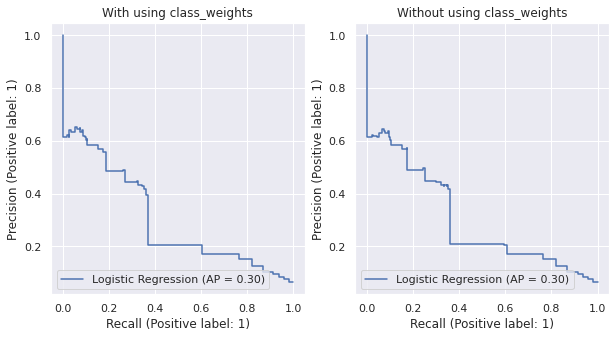

In [ ]:
from sklearn.metrics import plot_precision_recall_curve
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 5))

plot_precision_recall_curve(logistic_regressor, X_test, ytest, name = 'Logistic Regression', ax = axs[0])
axs[0].set_title("With using class_weights")

plot_precision_recall_curve(logistic_regressor2, X_test, ytest, name = 'Logistic Regression', ax = axs[1])
axs[1].set_title("Without using class_weights")

plt.show()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


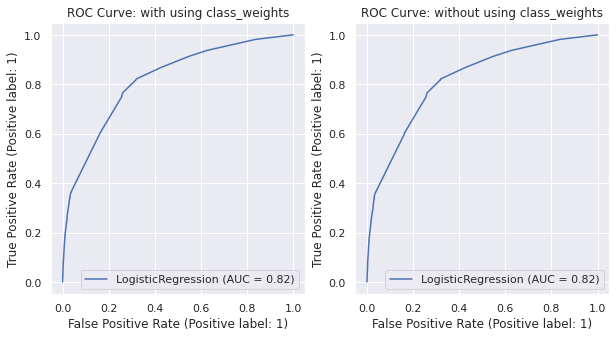

In [ ]:
# roc_curve() computes the ROC for the classifier and returns the FPR, TPR, and threshold values
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_roc_curve

fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 5))
# With using class_weights
plot_roc_curve(logistic_regressor, X_test, ytest, ax=axs[0])
axs[0].set_title("ROC Curve: with using class_weights")

plot_roc_curve(logistic_regressor2, X_test, ytest, ax=axs[1])
axs[1].set_title("ROC Curve: without using class_weights")

plt.show()

#### Classification Report

In [ ]:
# YOUR CODE HERE
from sklearn.metrics import classification_report
classificationReport = classification_report(ytest, y_pred_test)
print("With using class_weights, the classification_report:\n",classificationReport)

classificationReport2 = classification_report(ytest, y_pred_test2)
print("Without using class_weights, the classification_report:\n",classificationReport2)

With using class_weights, the classification_report:
               precision    recall  f1-score   support

           0       0.98      0.68      0.80     28026
           1       0.15      0.82      0.26      1974

    accuracy                           0.69     30000
   macro avg       0.57      0.75      0.53     30000
weighted avg       0.93      0.69      0.77     30000

Without using class_weights, the classification_report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97     28026
           1       0.62      0.10      0.17      1974

    accuracy                           0.94     30000
   macro avg       0.78      0.55      0.57     30000
weighted avg       0.92      0.94      0.91     30000



#### Confusion matrix

In [ ]:
# YOUR CODE HERE
from sklearn.metrics import confusion_matrix
CMat = confusion_matrix(ytest, y_pred_test)
print("With using class_weights, the confusion matrix:\n",CMat)

CMat2 = confusion_matrix(ytest, y_pred_test2)
print("Without using class_weights, the confusion matrix:\n",CMat2)

With using class_weights, the confusion matrix:
 [[19106  8920]
 [  359  1615]]
Without using class_weights, the confusion matrix:
 [[27901   125]
 [ 1774   200]]


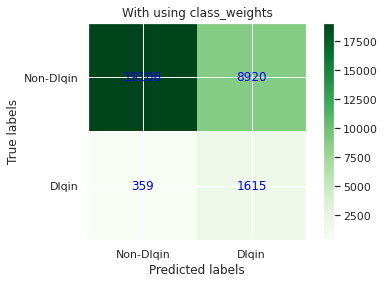

In [ ]:
# plot confusion matrix
fig, ax = plt.subplots()
im = ax.imshow(CMat, cmap='Greens')

# add colorbar
cbar = ax.figure.colorbar(im, ax=ax)

# set axis labels
plt.title('With using class_weights')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')

# add tick labels
ax.set_xticks(range(len(CMat)))
ax.set_yticks(range(len(CMat)))
ax.set_xticklabels(['Non-Dlqin', 'Dlqin'])
ax.set_yticklabels(['Non-Dlqin', 'Dlqin'])

# add annotations
for i in range(len(CMat)):
    for j in range(len(CMat)):
        text = ax.text(j, i, CMat[i][j],
                       ha="center", va="center", color="blue")

# display plot
plt.show()

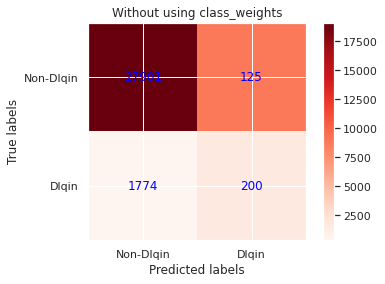

In [ ]:
# plot confusion matrix
fig, ax = plt.subplots()
im = ax.imshow(CMat, cmap='Reds')

# add colorbar
cbar = ax.figure.colorbar(im, ax=ax)

# set axis labels
plt.title('Without using class_weights')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')

# add tick labels
ax.set_xticks(range(len(CMat2)))
ax.set_yticks(range(len(CMat2)))
ax.set_xticklabels(['Non-Dlqin', 'Dlqin'])
ax.set_yticklabels(['Non-Dlqin', 'Dlqin'])

# add annotations
for i in range(len(CMat2)):
    for j in range(len(CMat2)):
        text = ax.text(j, i, CMat2[i][j],
                       ha="center", va="center", color="blue")

# display plot
plt.show()

### Report Analysis

* Comment on the performance of the model with weightage and without weightage
* Have you tried implementing Logistic regression with normal features instead of WOE ?
  - Compare the classification report for both implementations

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Load the dataset
GiveMeSomeCredit_data = pd.read_csv("GiveMeSomeCredit.csv")
GiveMeSomeCredit_data.head()
df = GiveMeSomeCredit_data
df.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [ ]:
df.isna().sum()


Unnamed: 0                                  0
SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

In [ ]:
df= df.fillna((df.mean()))
df.isna().sum()

Unnamed: 0                              0
SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

In [ ]:
# Split the dataset into train and test sets
X = df.drop(['SeriousDlqin2yrs'], axis=1)
X = X.drop(['Unnamed: 0'], axis=1)
y = df['SeriousDlqin2yrs']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
relevant_cols = list([X.columns])
relevant_cols = ['RevolvingUtilizationOfUnsecuredLines', 'age', 'NumberOfTime30-59DaysPastDueNotWorse',\
                 'DebtRatio', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',\
                 'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents']
relevant_cols

['RevolvingUtilizationOfUnsecuredLines',
 'age',
 'NumberOfTime30-59DaysPastDueNotWorse',
 'DebtRatio',
 'MonthlyIncome',
 'NumberOfOpenCreditLinesAndLoans',
 'NumberOfTimes90DaysLate',
 'NumberRealEstateLoansOrLines',
 'NumberOfTime60-89DaysPastDueNotWorse',
 'NumberOfDependents']

In [ ]:
# Feature engineering and selection
relevant_cols = relevant_cols
X_train = X_train[relevant_cols]
X_test = X_test[relevant_cols]

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Fit the logistic regression model on training data with normal features
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

# Predict the outcomes for the test data using the trained model
y_pred = logreg.predict(X_test)

# Evaluate the model performance using classification report
print("Classification report for logistic regression model with normal features:")
print(classification_report(y_test, y_pred))

Classification report for logistic regression model with normal features:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     28044
           1       0.52      0.04      0.07      1956

    accuracy                           0.94     30000
   macro avg       0.73      0.52      0.52     30000
weighted avg       0.91      0.94      0.91     30000



In [ ]:
X = WOE_Transformed_df[extracted_features]
woe_cols = X.columns
woe_cols

Index(['RevolvingUtilizationOfUnsecuredLines', 'NumberOfTimes90DaysLate',
       'NumberOfTime30-59DaysPastDueNotWorse',
       'NumberOfTime60-89DaysPastDueNotWorse', 'age'],
      dtype='object')

In [ ]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9
0,-0.022803,-1.576975,-0.100746,-0.180840,-0.170403,-0.672522,-0.063764,-0.900750,-0.057706,-0.688087
1,-0.020393,0.184209,-0.100746,-0.180416,-0.353522,0.493412,-0.063764,-0.017611,-0.057706,-0.688087
2,-0.022803,-0.628645,-0.100746,-0.180824,-0.183248,-1.255488,-0.063764,-0.900750,-0.057706,2.943865
3,-0.021217,-0.831859,-0.100746,-0.180815,0.169560,-1.255488,-0.063764,-0.900750,-0.057706,3.851854
4,-0.022803,-1.170548,-0.100746,-0.180777,-0.063991,0.687734,-0.063764,-0.017611,-0.057706,-0.688087
...,...,...,...,...,...,...,...,...,...,...
119995,-0.022369,1.335753,-0.100746,-0.180383,-0.195364,1.659345,-0.063764,0.865527,-0.057706,0.219901
119996,-0.022448,0.997064,0.137824,0.736676,-0.000478,0.299089,-0.063764,-0.017611,-0.057706,0.219901
119997,-0.022525,-0.222218,-0.100746,-0.180499,-0.282945,-0.089555,-0.063764,0.865527,-0.057706,-0.688087
119998,-0.021914,-1.102810,-0.100746,-0.180833,-0.377826,-1.255488,-0.063764,-0.900750,-0.057706,-0.688087


In [ ]:
#@title
# YOUR CODE HERE
import pandas as pd
from xverse.transformer import MonotonicBinning
from xverse.transformer import WOE

# Binning
clf = MonotonicBinning()
clf.fit(credit_data_df, credit_data_df['SeriousDlqin2yrs'])
print(clf.bins)

# Feature transformation using xverse package
xverse_transformed_feature = clf.transform(credit_data_df.iloc[:,1:])
xverse_transformed_feature.head()



# Calculating Weight of Evidence using xverse package
clf = WOE()
clf.fit(credit_data_df, credit_data_df['SeriousDlqin2yrs'])

#Weight of Evidence calculation:
# WOE transformation dataset
clf.woe_df.head()



WOE_Transformed_df = clf.transform(credit_data_df.iloc[:,1:])
WOE_Transformed_df


# Information Value calculation:
#Information value dataset
Information_value_df = clf.iv_df
Information_value_df



extracted_features = clf.iv_df.Variable_Name.values[:5]
print("extracted_features:\n",extracted_features)
#print("Transformed data by WoE values:",woe_data)



# YOUR CODE HERE
print("Before WOE transformation and Information Value, the no. of features:",WOE_Transformed_df.shape[1])
print("After WOE transformation and Information Value, the no. of features:",len(extracted_features))



# Selecting the Information Value weighted extracted_features from the WOE transformed dataset
X = WOE_Transformed_df[extracted_features]

# As the target doesn't need to  undergo WOE transformation, hence we select the target as below
y = credit_data_df['SeriousDlqin2yrs']
print("X Dimension:",X.shape)
print("y Dimension:",y.shape)

# Doing Train Test split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=66)
print("Xtrain Dimension:",Xtrain.shape)
print("ytrain Dimension:",ytrain.shape)
print("Xtest Dimension:",Xtest.shape)
print("ytest Dimension:",ytest.shape)


# YOUR CODE HERE
# Adding the Bias feature X0
b = np.ones((Xtrain.shape[0], 1))  
X_train = np.concatenate((b, Xtrain), axis=1)
print("After adding Bias Feature, X_train Dimension:",X_train.shape)
X_test = np.concatenate((np.ones((Xtest.shape[0], 1)), Xtest), axis=1)
print("After adding Bias Feature, X_test Dimension:",X_test.shape)
# Defining Initial weights
w = np.zeros(X_train.shape[1])
print("\nDimension of weights vector:",w.shape)




# Without weightage
# YOUR CODE HERE
logistic_regressor2 = LogisticRegression()
logistic_regressor2.fit(X_train, ytrain)
print(X_train.shape) 
print(X_test.shape)
training_score2 = logistic_regressor2.score(X_train, ytrain)
print("Score without using class_weight:")
print("Training_Score:",training_score2)

testing_score2 = logistic_regressor2.score(X_test,ytest)
print("Testing_Score:",testing_score2)


# Predicting the classes
y_pred_test2 = logistic_regressor2.predict(X_test)
print("\nWithout using class_weight, the Predicted Class:",y_pred_test2)


# Without class_weights
coeffs = logistic_regressor2.coef_
intercept = logistic_regressor2.intercept_
b = logistic_regressor2.coef_[0][-1] # PDO = ln(2) / b ---> b = ln(2) / PDO
p_hat = logistic_regressor2.predict_proba
print("Without class_weights:\n")
print("coeffs:",coeffs)
print("intercept:",intercept)
print("b is the ratio between ln(2) and PDO, b=",b)
print("p_hat =",p_hat)




# Scaling factors
# Without class_weights
coeffs = logistic_regressor2.coef_
intercept = logistic_regressor2.intercept_


factor = 20/np.log(2)
offset = 600 - ( factor * np.log(50))
factor, offset, coeffs


# YOUR CODE HERE
# Doing Train Test split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=66)
print("X Dimension:",X.shape)
print("Xtrain Dimension:",Xtrain.shape)
print("ytrain Dimension:",ytrain.shape)
print("Xtest Dimension:",Xtest.shape)
print("ytest Dimension:",ytest.shape)
print("X_train Dimension",X_train.shape)
print("X_test Dimension",X_test.shape)
X_features = np.vstack([X_train, X_test])
print("X_features Dimension",X_features.shape)
X_features = pd.DataFrame(X_features)

# Method-1:
scores = []
alpha = intercept
n = X_features.shape[1] # No. of independent features including Bias feature
# for idx, row in X_features.iterrows():
    # Score  = []
    # for i in range(len(row)+1):
        #score_i = ((-(coeffs[i] * row[i] + (alpha/n)) * factor) + (offset/n))
        # score_i = (-((row[i] * coeffs[i]) + (alpha/n)) * factor) + (offset/n)
        # Score.append(score_i)
    # Score = sum(Score)
    # scores.append(Score)
# print("All scores:",scores)
# print("Maximum Score:",max(scores))
# print("Minimum Score:",min(scores))



# Method-2:
scores = []
alpha = intercept
n = X_features.shape[1] # No. of independent features including Bias Feature
Beta = coeffs.ravel()
for idx, row in X_features.iterrows():
  part1 = Beta * row.values                       # Beta_i * WoE_i
  part2 = part1 + (alpha/n)                       # (Beta_i * WoE_i) + alpha / n
  part3 = -part2 * factor                         # -((Beta_i * WoE_i) + alpha / n) * Factor
  part4 = part3 + (offset/X_features.shape[1])    # -((Beta_i * WoE_i) + alpha / n) * Factor) + Offset / n
  Score = sum(part4)                              # sum
  scores.append(Score)                            # storing Score of each row in scores

print("All scores:",np.array(scores))
print("Maximum Score:",max(scores))
print("Minimum Score:",min(scores))

{'SeriousDlqin2yrs': array([0., 1.]), 'RevolvingUtilizationOfUnsecuredLines': array([0.00000000e+00, 5.44198870e-02, 3.79945496e-01, 5.07080000e+04]), 'age': array([  0.,  45.,  59., 109.]), 'NumberOfTime30-59DaysPastDueNotWorse': array([ 0.,  1., 98.]), 'DebtRatio': array([0.00000000e+00, 2.38192456e-01, 5.69938302e-01, 3.29664000e+05]), 'MonthlyIncome': array([      0.        ,    4700.        ,    6670.22123739,
       3008750.        ]), 'NumberOfOpenCreditLinesAndLoans': array([ 0.,  6., 10., 58.]), 'NumberOfTimes90DaysLate': array([ 0.,  1., 98.]), 'NumberRealEstateLoansOrLines': array([ 0.,  1., 54.]), 'NumberOfTime60-89DaysPastDueNotWorse': array([ 0.,  1., 98.]), 'NumberOfDependents': array([ 0.,  1., 20.])}


/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


extracted_features:
 ['RevolvingUtilizationOfUnsecuredLines' 'NumberOfTimes90DaysLate'
 'NumberOfTime30-59DaysPastDueNotWorse'
 'NumberOfTime60-89DaysPastDueNotWorse' 'age']
Before WOE transformation and Information Value, the no. of features: 10
After WOE transformation and Information Value, the no. of features: 5
X Dimension: (150000, 5)
y Dimension: (150000,)
Xtrain Dimension: (120000, 5)
ytrain Dimension: (120000,)
Xtest Dimension: (30000, 5)
ytest Dimension: (30000,)
After adding Bias Feature, X_train Dimension: (120000, 6)
After adding Bias Feature, X_test Dimension: (30000, 6)

Dimension of weights vector: (6,)
(120000, 6)
(30000, 6)
Score without using class_weight:
Training_Score: 0.93545
Testing_Score: 0.9367

Without using class_weight, the Predicted Class: [0 0 0 ... 0 0 0]
Without class_weights:

coeffs: [[1.00695776e-04 7.70365725e-01 6.02066046e-01 6.20241202e-01
  3.96647481e-01 5.22567725e-01]]
intercept: [-2.60835019]
b is the ratio between ln(2) and PDO, b= 0.522567

In [ ]:
# YOUR CODE HERE
from sklearn.metrics import classification_report
#classificationReport = classification_report(ytest, y_pred_test)
#print("With using class_weights, the classification_report:\n",classificationReport)

classificationReport2 = classification_report(ytest, y_pred_test2)
print("With using WOE, the classification_report:\n",classificationReport2)

With using WOE, the classification_report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97     28026
           1       0.62      0.10      0.17      1974

    accuracy                           0.94     30000
   macro avg       0.78      0.55      0.57     30000
weighted avg       0.92      0.94      0.91     30000



In [ ]:
precision_hike_ratio = (0.62/0.52)
print("precision_hike_ratio:",precision_hike_ratio)
recall_hike_ratio = (0.10/0.04)
print("recall_hike_ratio:",recall_hike_ratio)
F1_score_hike_ratio = (0.17/0.07)
print("F1_score_hike_ratio:",F1_score_hike_ratio)

precision_hike_ratio: 1.1923076923076923
recall_hike_ratio: 2.5
F1_score_hike_ratio: 2.4285714285714284
